In [43]:
max_date = data_clean['InvoiceDate'].max()
rfm = data_clean.groupby('CustomerID').agg({'InvoiceDate': lambda x: (max_date - x.max()).days}).rename(columns={'InvoiceDate': 'Recency'})

In [44]:
rfm['Frequency'] = data_clean.groupby('CustomerID')['InvoiceNo'].nunique()

In [47]:
data_clean.loc[:,'TotalSpend'] = data_clean['Quantity'] * data_clean['UnitPrice']
rfm['Monetary'] = data_clean.groupby('CustomerID')['TotalSpend'].sum()

In [48]:
print(rfm.head())

            Recency  Frequency  Monetary
CustomerID                              
12346.0         325          2      0.00
12347.0           1          7   4310.00
12348.0          74          4   1797.24
12349.0          18          1   1757.55
12350.0         309          1    334.40


In [49]:
rfm.count()

Recency      4372
Frequency    4372
Monetary     4372
dtype: int64

In [54]:
data_clean.count()

InvoiceNo      406829
StockCode      406829
Description    406829
Quantity       406829
InvoiceDate    406829
UnitPrice      406829
CustomerID     406829
Country        406829
TotalSpend     406829
dtype: int64

In [57]:
import plotly.express as px

# Recency Distribution
fig_recency = px.histogram(rfm, x='Recency', nbins=20, title='Distribution of Recency (R)')
fig_recency.update_xaxes(title='Days Since Last Purchase')
fig_recency.update_yaxes(title='Count of Customers')
fig_recency.show()

In [ ]:
rfm.count()

In [60]:
fig_frequency = px.histogram(rfm, x='Frequency', nbins=20, title='Distribution of Frequency (F)')
fig_frequency.update_xaxes(title='Number of Orders')
fig_frequency.update_yaxes(title='Count of Customers')
fig_frequency.show()

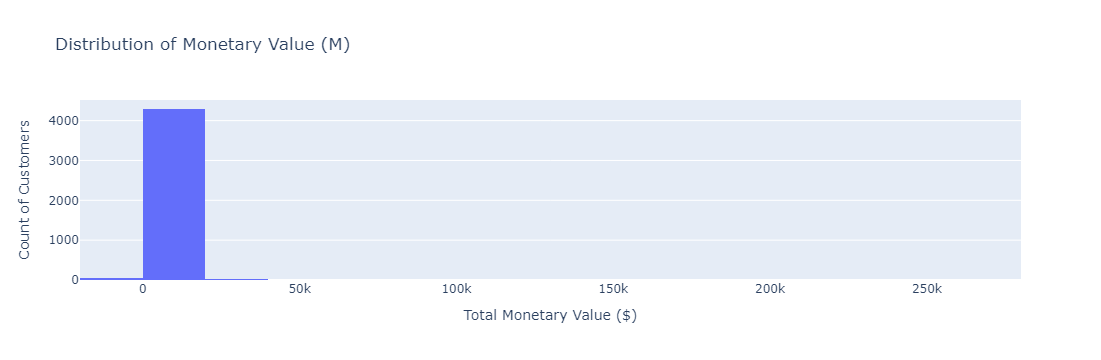

In [61]:
fig_monetary = px.histogram(rfm, x='Monetary', nbins=20, title='Distribution of Monetary Value (M)')
fig_monetary.update_xaxes(title='Total Monetary Value ($)')
fig_monetary.update_yaxes(title='Count of Customers')
fig_monetary.show()